## Maestría en Maestría en Ciencia de Datos e Inteligencia Artificial
### 8. Machine Learning and Deep Learning
### Docente: Msc. Renzo Claure Aracena.

### *Componentes Principales*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from scipy.stats import entropy

In [3]:
#Cargar los datos
data = load_wine()
X = data.data
y = data.target

In [4]:
#Si se quiere trabajar como Dataframe
df = pd.DataFrame( data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
df.shape

(178, 13)

In [6]:
#Normalizar, continuaremos con numpy, pero se puede adaptar a pandas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
#Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [9]:
X_pca.shape

(178, 13)

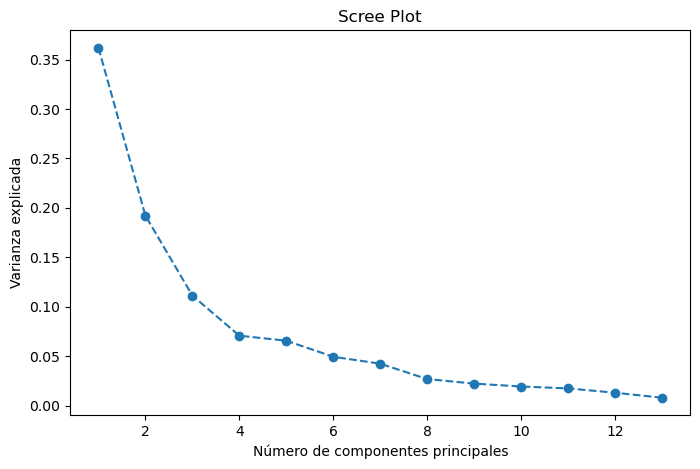

In [10]:
#Gráfico de sedimentación
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.show()

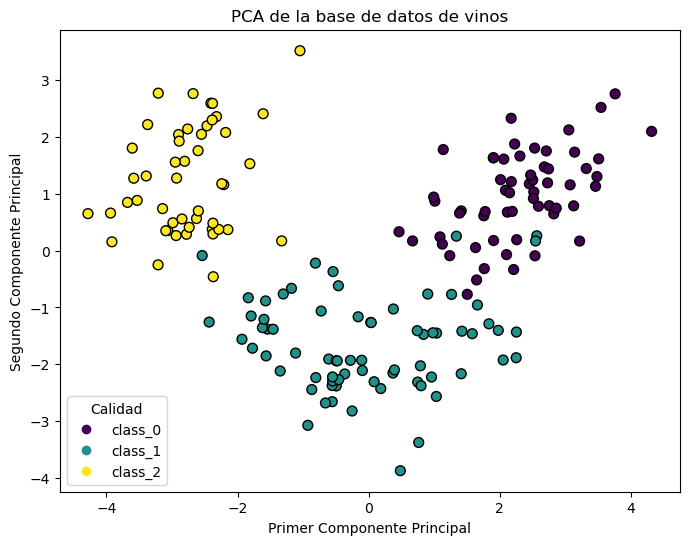

In [14]:
#Visualización de los componentes principales
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA de la base de datos de vinos')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(handles=scatter.legend_elements()[0], labels=list(data.target_names), title="Calidad")
plt.show()

In [15]:
import seaborn as sns

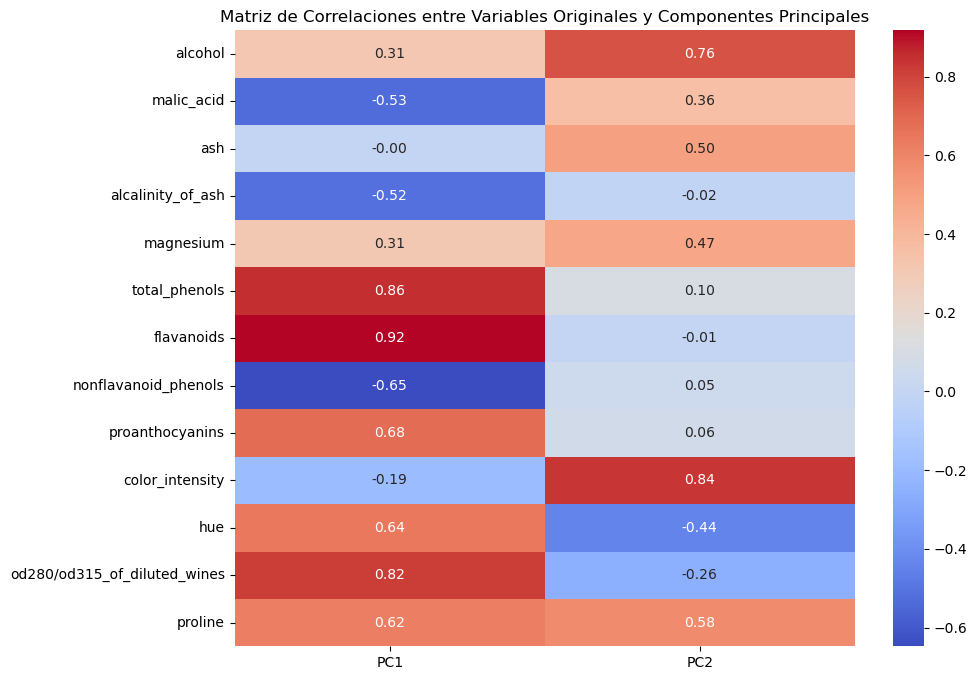

In [16]:
#Matriz de correlaciones
component_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=component_names)

# Agregar las variables originales al DataFrame
df_original = pd.DataFrame(X_scaled, columns=data.feature_names)

# Combinar los DataFrames
df_combined = pd.concat([df_original, df_pca], axis=1)

# Calcular la matriz de correlaciones
correlation_matrix = df_combined.corr()
cols1 = list(df_original.columns)
correlation_matrix = correlation_matrix.loc[data.feature_names, component_names[0: 2] ]

# Visualizar la matriz de correlaciones con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones entre Variables Originales y Componentes Principales')
plt.show()


### Escalamiento Multidimensional (MDS)

In [17]:
#Matriz de distancias
import numpy as np
from sklearn.metrics import pairwise_distances

In [18]:
# Datos de ejemplo (3 puntos en 2D)
X = np.array([
    [1, 2],  # Punto A
    [4, 6],  # Punto B
    [7, 8]   # Punto C
])

# Calcular la matriz de distancias
dissimilarities = pairwise_distances(X, metric='euclidean')
print("Matriz de distancias (disimilaridades):")
print(dissimilarities)

Matriz de distancias (disimilaridades):
[[0.         5.         8.48528137]
 [5.         0.         3.60555128]
 [8.48528137 3.60555128 0.        ]]


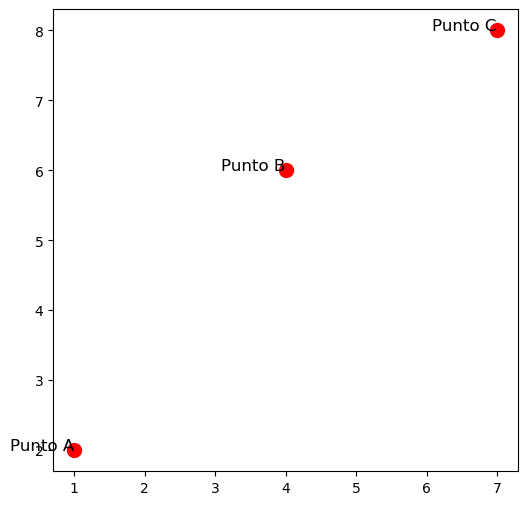

In [19]:
import matplotlib.pyplot as plt

# Graficar los puntos
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c='red', s=100, label='Puntos')
for i, (x, y) in enumerate(X):
    plt.text(x, y, f'Punto {chr(65 + i)}', fontsize=12, ha='right')

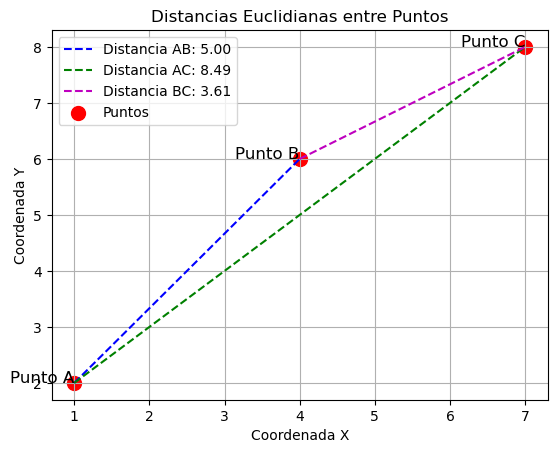

In [20]:
#Dibujar las distancias
plt.plot([X[0, 0], X[1, 0]], [X[0, 1], X[1, 1]], 'b--', label=f'Distancia AB: {dissimilarities[0, 1]:.2f}')
plt.plot([X[0, 0], X[2, 0]], [X[0, 1], X[2, 1]], 'g--', label=f'Distancia AC: {dissimilarities[0, 2]:.2f}')
plt.plot([X[1, 0], X[2, 0]], [X[1, 1], X[2, 1]], 'm--', label=f'Distancia BC: {dissimilarities[1, 2]:.2f}')

# Configuración del gráfico
plt.scatter(X[:, 0], X[:, 1], c='red', s=100, label='Puntos')
for i, (x, y) in enumerate(X):
    plt.text(x, y, f'Punto {chr(65 + i)}', fontsize=12, ha='right')
plt.title('Distancias Euclidianas entre Puntos')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

In [23]:
# Cargar la base de datos de flores
data = load_iris()
X = data.data
y = data.target

In [24]:
list(data.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

In [25]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Calcular la matriz de distancias (disimilaridades)
dissimilarities = pairwise_distances(X_scaled, metric='euclidean')

In [28]:
# Aplicar MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)  #Si se calculo antes la matris de similaridad, si no dejarlo como euclidian
X_mds = mds.fit_transform(dissimilarities)

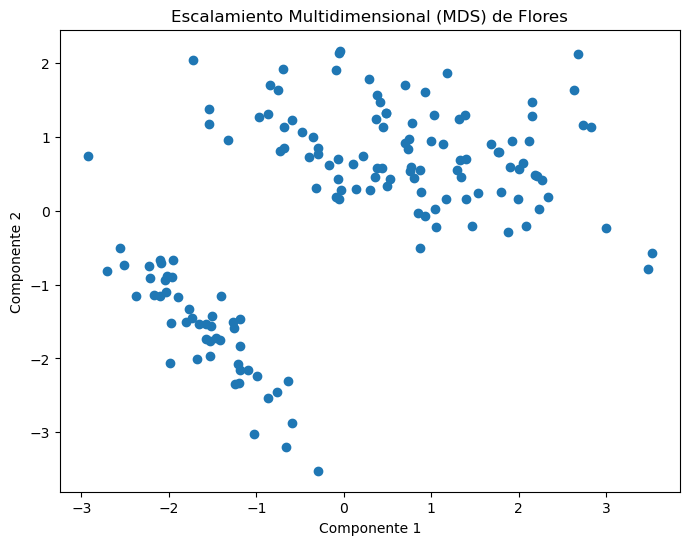

In [34]:
# Graficar los resultados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1])#, c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Escalamiento Multidimensional (MDS) de Flores')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
#plt.legend(handles=scatter.legend_elements()[0], labels=list(data.target_names), title="Clases")
plt.show()

In [33]:
mds.stress_

np.float64(235.4123780983506)

In [32]:
# Calcular el Stress normalizado
stress = mds.stress_ / np.sum(dissimilarities**2)  # Normalización
print(f"Stress normalizado: {stress:.4f}")

Stress normalizado: 0.0013
